# Downloading data (add kaggle.json file to runtime before running the next cells)

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%mkdir ~/.kaggle
%mv kaggle.json ~/.kaggle

### This is the fake dataset created with Stable Diffusion and Dreambooth finetuning (Model found at https://huggingface.co/arnavkartikeya/fakedmarinedata)

In [ ]:
! kaggle datasets download -d arnavkartikeya/fakefishdata

 99% 1.00G/1.01G [00:03<00:00, 263MB/s]
100% 1.01G/1.01G [00:04<00:00, 268MB/s]


In [ ]:
! unzip fakefishdata.zip

Archive:  fakefishdata.zip
  inflating: output/Fake_Black_Sea_Sprat/image_0.png  
  inflating: output/Fake_Black_Sea_Sprat/image_1.png  
  inflating: output/Fake_Black_Sea_Sprat/image_10.png  
  inflating: output/Fake_Black_Sea_Sprat/image_100.png  
  inflating: output/Fake_Black_Sea_Sprat/image_101.png  
  inflating: output/Fake_Black_Sea_Sprat/image_102.png  
  inflating: output/Fake_Black_Sea_Sprat/image_103.png  
  inflating: output/Fake_Black_Sea_Sprat/image_104.png  
  inflating: output/Fake_Black_Sea_Sprat/image_105.png  
  inflating: output/Fake_Black_Sea_Sprat/image_106.png  
  inflating: output/Fake_Black_Sea_Sprat/image_107.png  
  inflating: output/Fake_Black_Sea_Sprat/image_108.png  
  inflating: output/Fake_Black_Sea_Sprat/image_109.png  
  inflating: output/Fake_Black_Sea_Sprat/image_11.png  
  inflating: output/Fake_Black_Sea_Sprat/image_110.png  
  inflating: output/Fake_Black_Sea_Sprat/image_111.png  
  inflating: output/Fake_Black_Sea_Sprat/image_112.png  
  inflatin

### Real Kaggle dataset downloading

In [ ]:
! kaggle datasets download -d crowww/a-large-scale-fish-dataset

100% 3.24G/3.24G [00:51<00:00, 75.9MB/s]
100% 3.24G/3.24G [00:51<00:00, 67.3MB/s]


In [ ]:
! unzip a-large-scale-fish-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00435.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00436.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00437.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00438.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00439.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00440.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00441.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00442.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00443.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00444.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00445.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00446.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00447.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00448.png  
  inflating: Fish_Dataset/Fish_Dataset/

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from keras import models, layers
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from pathlib import Path
from sklearn.metrics import classification_report, confusion_matrix

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import tensorflow as tf

# Data formatting: Adding synthetic data to dataframes for training

In [ ]:
fake_data = []
for dir in os.listdir("output"):
  if(dir != ".DS_Store"):
    if dir == "Fake_Trout" or dir == "Fake_Red_Mullet" or dir == "Fake_Shrimp":
      for file in os.listdir("output/" +dir): 
        temp = "output/"+dir + "/" + file
        label = dir 
        label = label.replace("_", " ")
        label = label.lower()
        label = label.replace("fake", "")
        label = label.strip()
        if label == "guilt head bream":
          label = "gilt head bream"
        fake_data.append([temp, label])


fake_df = pd.DataFrame(fake_data, columns=['path', 'label'])

fake_df.head(5)

,path,label
0,output/Fake_Red_Mullet/image_163.png,red mullet
1,output/Fake_Red_Mullet/image_92.png,red mullet
2,output/Fake_Red_Mullet/image_87.png,red mullet
3,output/Fake_Red_Mullet/image_114.png,red mullet
4,output/Fake_Red_Mullet/image_97.png,red mullet


### Data formatting: Adding real data to dataframes for testing 

In [ ]:
data = []
for dir in os.listdir("Fish_Dataset/Fish_Dataset"):
  if(dir != ".DS_Store" and not ".txt" in dir and not ".m" in dir):
    count = 0
    if dir == "Trout" or dir == "Red Mullet" or dir == "Shrimp":
      for file in os.listdir("Fish_Dataset/Fish_Dataset/" +dir + "/" + dir): 
        if count == 50:
          break
        temp = "Fish_Dataset/Fish_Dataset/"+ dir + "/" + dir + "/" + file
        label = dir 
        label = label.replace("_", " ")
        label = label.lower()
        label = label.replace("fake", "")
        label = label.replace("-", " ")
        label = label.strip()
        data.append([temp, label])
        count += 1


temp_df = pd.DataFrame(data, columns=['path', 'label'])

In [ ]:
fin_data = []
for dir in os.listdir("Fish_Dataset/Fish_Dataset"):
  if(dir != ".DS_Store" and not ".txt" in dir and not ".m" in dir):
    count = 0
    if dir == "Trout" or dir == "Red Mullet" or dir == "Shrimp":
      for file in os.listdir("Fish_Dataset/Fish_Dataset/" +dir + "/" + dir): 
        if count == 300:
          break
        temp = "Fish_Dataset/Fish_Dataset/"+ dir + "/" + dir + "/" + file
        label = dir 
        label = label.replace("_", " ")
        label = label.lower()
        label = label.replace("fake", "")
        label = label.replace("-", " ")
        label = label.strip()
        fin_data.append([temp, label])
        count += 1


fin_df = pd.DataFrame(fin_data, columns=['path', 'label'])

### mix of synthetic plus real data

In [ ]:
mix_data = []
for dir in os.listdir("Fish_Dataset/Fish_Dataset"):
  if(dir != ".DS_Store" and not ".txt" in dir and not ".m" in dir):
    count = 0
    if dir == "Trout" or dir == "Red Mullet" or dir == "Shrimp":
      for file in os.listdir("Fish_Dataset/Fish_Dataset/" +dir + "/" + dir): 
        if count == 50:
          break
        temp = "Fish_Dataset/Fish_Dataset/"+ dir + "/" + dir + "/" + file
        label = dir 
        label = label.replace("_", " ")
        label = label.lower()
        label = label.replace("fake", "")
        label = label.replace("-", " ")
        label = label.strip()
        mix_data.append([temp, label])
        count += 1

mix_data.extend(fake_data)
mix_df = pd.DataFrame(mix_data, columns=['path', 'label'])

## Showing some fake data

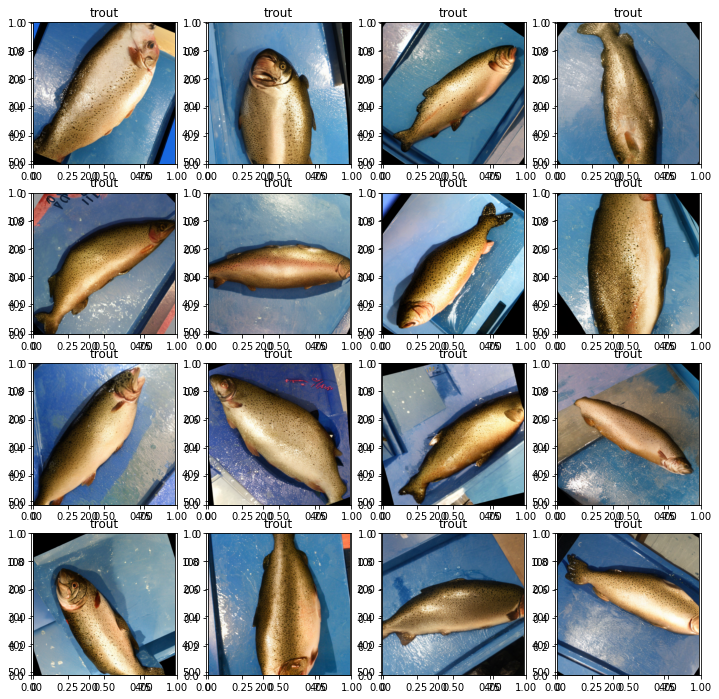

In [ ]:
class_name = "trout"
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))
spec = fake_df[fake_df["label"] == class_name]
i = 1
for index, row in spec.iterrows():
    if i == 17:
      break
    ax = fig.add_subplot(4,4,i)
    _ = ax.imshow(plt.imread(row["path"]))
    _ = ax.set_title(class_name)
    i+=1

### Showing some real data

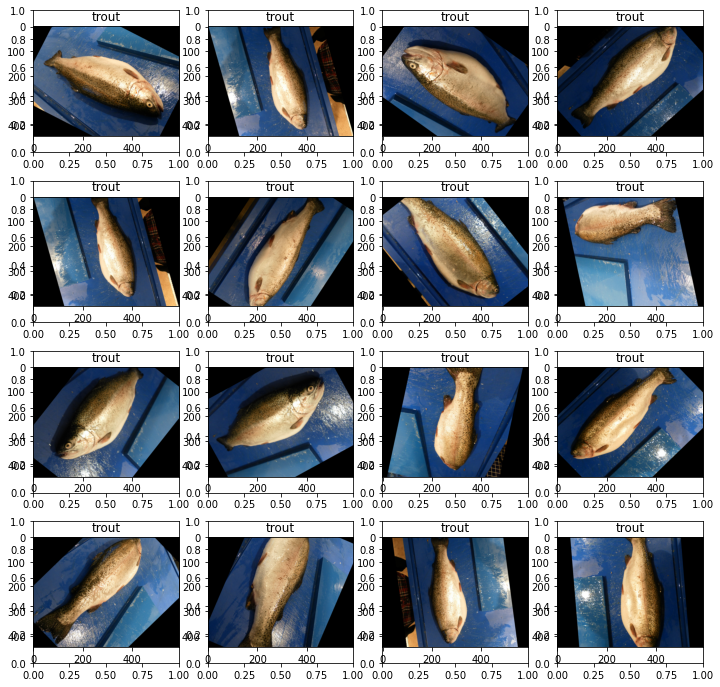

In [ ]:
class_name = "trout"
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))
spec = temp_df[temp_df["label"] == class_name]
i = 1
for index, row in spec.iterrows():
    if i == 17:
      break
    ax = fig.add_subplot(4,4,i)
    _ = ax.imshow(plt.imread(row["path"]))
    _ = ax.set_title(class_name)
    i+=1

## Back to data formatting

In [ ]:
fake_df.describe()
fake_df.isnull().any()
fake_df['label'].value_counts()

,path,label
count,900,900
unique,900,3
top,output/Fake_Red_Mullet/image_163.png,red mullet
freq,1,300


path     False
label    False
dtype: bool

red mullet    300
trout         300
shrimp        300
Name: label, dtype: int64

In [ ]:
fake_train_df, fake_test_df = train_test_split(fake_df, test_size=0.2, random_state=2, shuffle=True)
fake_train_df.count()
fake_test_df.count()

path     720
label    720
dtype: int64

path     180
label    180
dtype: int64

In [ ]:
temp_train_df, temp_test_df = train_test_split(temp_df, test_size=0.2, random_state=2, shuffle=True)
temp_train_df.count()
temp_test_df.count()

path     120
label    120
dtype: int64

path     30
label    30
dtype: int64

In [ ]:
fin_train_df, fin_test_df = train_test_split(fin_df, test_size=0.2, random_state=2, shuffle=True)
fin_train_df.count()
fin_test_df.count()

path     720
label    720
dtype: int64

path     180
label    180
dtype: int64

In [ ]:
mix_train_df, mix_test_df = train_test_split(mix_df, test_size=0.2, random_state=2, shuffle=True)
mix_train_df.count()
mix_test_df.count()

path     840
label    840
dtype: int64

path     210
label    210
dtype: int64

## 50 images vs 50 + synthetic data (on cnn from scratch)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
# Helper libraries
import numpy as np
import matplotlib.pyplot as pl

In [ ]:
train_generator = ImageDataGenerator(validation_split=0.2)
test_generator = ImageDataGenerator()

train_images = train_generator.flow_from_dataframe(
    dataframe=temp_train_df,
    x_col='path',
    y_col='label',
    target_size=(512, 512),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=fin_train_df,
    x_col='path',
    y_col='label',
    target_size=(512, 512),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=fin_test_df,
    x_col='path',
    y_col='label',
    target_size=(512, 512),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 96 validated image filenames belonging to 3 classes.
Found 144 validated image filenames belonging to 3 classes.
Found 180 validated image filenames belonging to 3 classes.


In [ ]:
#setup model
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), padding="Same", activation="relu", input_shape=(512, 512, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding="Same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding="Same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), padding="Same", activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 512, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 256, 256, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 64)       0

In [ ]:
eps = 10
history = model.fit(train_images, epochs=eps, batch_size=32, validation_data=val_images)

Epoch 1/10
3/3 [==============================] - 17s 2s/step - loss: 3839.4006 - accuracy: 0.3333 - val_loss: 28.7653 - val_accuracy: 0.2847
Epoch 2/10
3/3 [==============================] - 4s 1s/step - loss: 13.3108 - accuracy: 0.3229 - val_loss: 3.6539 - val_accuracy: 0.3611
Epoch 3/10
3/3 [==============================] - 4s 1s/step - loss: 2.5219 - accuracy: 0.4479 - val_loss: 0.9835 - val_accuracy: 0.6250
Epoch 4/10
3/3 [==============================] - 4s 1s/step - loss: 0.8456 - accuracy: 0.6354 - val_loss: 0.5956 - val_accuracy: 0.6944
Epoch 5/10
3/3 [==============================] - 4s 1s/step - loss: 0.8104 - accuracy: 0.6771 - val_loss: 0.5300 - val_accuracy: 0.7292
Epoch 6/10
3/3 [==============================] - 4s 1s/step - loss: 0.5227 - accuracy: 0.8229 - val_loss: 0.4752 - val_accuracy: 0.7986
Epoch 7/10
3/3 [==============================] - 4s 1s/step - loss: 0.4835 - accuracy: 0.8021 - val_loss: 0.3636 - val_accuracy: 0.8194
Epoch 8/10
3/3 [===================

In [ ]:
train_generator = ImageDataGenerator(validation_split=0.2)
test_generator = ImageDataGenerator()

train_images = train_generator.flow_from_dataframe(
    dataframe=mix_train_df,
    x_col='path',
    y_col='label',
    target_size=(512, 512),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=fin_train_df,
    x_col='path',
    y_col='label',
    target_size=(512, 512),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=fin_test_df,
    x_col='path',
    y_col='label',
    target_size=(512, 512),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 672 validated image filenames belonging to 3 classes.
Found 144 validated image filenames belonging to 3 classes.
Found 180 validated image filenames belonging to 3 classes.


In [ ]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
eps = 10
d_history = model.fit(train_images, epochs=eps, batch_size=32, validation_data=val_images)

Epoch 1/10
3/3 [==============================] - 4s 2s/step - loss: 0.1522 - accuracy: 0.9479 - val_loss: 0.3780 - val_accuracy: 0.8750
Epoch 2/10
3/3 [==============================] - 3s 1s/step - loss: 0.1441 - accuracy: 0.9375 - val_loss: 1.3456 - val_accuracy: 0.7500
Epoch 3/10
3/3 [==============================] - 3s 1s/step - loss: 1.4979 - accuracy: 0.7396 - val_loss: 0.7619 - val_accuracy: 0.7778
Epoch 4/10
3/3 [==============================] - 3s 1s/step - loss: 0.5491 - accuracy: 0.8542 - val_loss: 0.4182 - val_accuracy: 0.8333
Epoch 5/10
3/3 [==============================] - 4s 2s/step - loss: 0.1223 - accuracy: 0.9688 - val_loss: 0.4679 - val_accuracy: 0.8542
Epoch 6/10
3/3 [==============================] - 4s 1s/step - loss: 0.0626 - accuracy: 0.9792 - val_loss: 0.3157 - val_accuracy: 0.8819
Epoch 7/10
3/3 [==============================] - 3s 1s/step - loss: 0.1447 - accuracy: 0.9688 - val_loss: 0.2671 - val_accuracy: 0.9167
Epoch 8/10
3/3 [=========================

In [ ]:
test_generator = ImageDataGenerator()
test_data_generator = test_images
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())  

import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """


              precision    recall  f1-score   support

  red mullet       0.94      1.00      0.97        65
      shrimp       0.97      0.94      0.95        65
       trout       1.00      0.96      0.98        50

    accuracy                           0.97       180
   macro avg       0.97      0.97      0.97       180
weighted avg       0.97      0.97      0.97       180



## Some improvements on synthetic data

In [ ]:
# synthetic data
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')
eps = 10
q_history = model.fit(train_images, epochs=eps, batch_size=32, validation_data=val_images, callbacks=[earlyStopping, mcp_save, reduce_lr_loss])

Epoch 1/10
21/21 [==============================] - 15s 727ms/step - loss: 0.3310 - accuracy: 0.8854 - val_loss: 0.4970 - val_accuracy: 0.9028 - lr: 1.0000e-04
Epoch 2/10
21/21 [==============================] - 15s 719ms/step - loss: 0.1972 - accuracy: 0.9137 - val_loss: 0.4109 - val_accuracy: 0.9236 - lr: 1.0000e-04
Epoch 3/10
21/21 [==============================] - 15s 717ms/step - loss: 0.1638 - accuracy: 0.9435 - val_loss: 0.2992 - val_accuracy: 0.9375 - lr: 1.0000e-04
Epoch 4/10
21/21 [==============================] - 13s 616ms/step - loss: 0.1255 - accuracy: 0.9554 - val_loss: 0.4897 - val_accuracy: 0.9236 - lr: 1.0000e-04
Epoch 5/10
21/21 [==============================] - 15s 708ms/step - loss: 0.1049 - accuracy: 0.9628 - val_loss: 0.2770 - val_accuracy: 0.9514 - lr: 1.0000e-04
Epoch 6/10
21/21 [==============================] - 13s 616ms/step - loss: 0.0711 - accuracy: 0.9702 - val_loss: 0.3056 - val_accuracy: 0.9514 - lr: 1.0000e-04
Epoch 7/10
21/21 [======================

Text(0.5, 1.0, 'Training and Validation accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

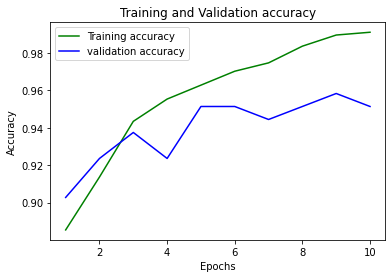

In [ ]:
loss_train = q_history.history['accuracy']
loss_val = q_history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()